#Abstractions in decision making

What do you mean with abstractions? Give some intro

##Taxonomy example

describe taxonomy, show plot of utility

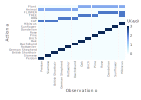

In [3]:
using RateDistortionDecisionMaking

#set up taxonomy example
include("TaxonomyExample.jl")
o_vec, o_strings, a_vec, a_strings, p_o, U = setuptaxonomy()


#pre-compute utilities, find maxima
U_pre, Umax = setuputilityarrays(a_vec,o_vec,U)

#visualize utility
plt_utility = visualizeMatrix(U_pre, o_vec, a_vec, o_strings, a_strings, xlabel="Observation o",
                              ylabel="Action a", legendlabel="U(a,o)")


In [4]:
β = 1 #inverse temperature
ε = 0.000001 #convergence critetion for BAiterations
maxiter = 10000 #maximum number of BA iterations

#initialize p(a) uniformly
num_acts = length(a_vec)
pa_init = ones(num_acts)/num_acts 

#Blahut-Arimotot iterations
p_ago, p_a, performance = BAiterations(pa_init, β, U_pre, Umax, p_o, ε, maxiter, compute_performance=true, 
                                       performance_as_dataframe=true, performance_per_iteration=false)


#visualize solution
#suppress immediate plotting since the stacked plots look bad, rather use display() to show each plot separately
plot_marg, plot_cond = visualizeBAsolution(p_a, p_ago, a_vec, o_vec, a_strings, o_strings,
                                           olabel="Observation o", alabel="Action a",
                                           legendlabel_marginal="p(a)", legendlabel_conditional="p(a|o)",suppress_vis=true);
display(plot_marg)
display(plot_cond)


<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 1.0 
 0.0 
 0.5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p(a) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Persian 
 Siamese 
 British Shorthair 
 German Shepherd 
 Rottweiler 
 Dachshund 
 Oak 
 Birch 
 Pine 
 Rose 
 Dandelion 
 Sunflower 
 Hibiscus 
 CAT 
 DOG 
 TREE 
 FLOWER 
 Animal 
 Plant 
 
 
 Action a

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Observation o 
 
 
 Persian 
 Siamese 
 British Shorthair 
 German Shepherd 
 Rottweiler 
 Dachshund 
 Oak 
 Birch 
 Pine 
 Rose 
 Dandelion 
 Sunflower 
 Hibiscus 
 
 
 
 1.0 
 0.0 
 0.5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p(a|o) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Persian 
 Siamese 
 British Shorthair 
 German Shepherd 
 Rottweiler 
 Dachshund 
 Oak 
 Birch 
 Pine 
 Rose 
 Dandelion 
 Sunflower 
 Hibiscus 
 CAT 
 DOG 
 TREE 
 FLOWER 
 Animal 
 Plant 
 
 
 Action a

In [5]:
#β-sweep

ε = 0.000001 #convergence critetion for BAiterations
maxiter = 10000
β_sweep = [0.01:0.005:3]
#β_sweep = [0.1:0.05:2, 2:0.5:15]

nβ = length(β_sweep)

#preallocate
I = zeros(nβ)
Ha = zeros(nβ)
Hago = zeros(nβ)
EU = zeros(nβ)
RDobj = zeros(nβ)

for i=1:nβ    
    pago, pa, I[i], Ha[i], Hago[i], EU[i], RDobj[i] = BAiterations(pa_init, β_sweep[i], U_pre, Umax, p_o, ε, maxiter,compute_performance=true)  
end

plot_perf_entropy, plot_perf_util, plot_rateutility = plotperformancemeasures(I, Ha, Hago, EU, RDobj, β_sweep);

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 β 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 
 E[U] 
 RU_obj 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path fill="none" d="M18.88,72.23 L 19.05 72.23 19.21 72.23 19.38 72.23 19.55 72.23 19.71 72.23 19.88 72.23 20.05 72.23 20.21 72.23 20.38 72.23 20.55 72.23 20.71 72.23 20.88 72.23 21.05 72.23 21.21 72.23 21.38 72.23 21.55 72.23 21.71 72.23 21.88 72.21 22.05 72.19 22.21 72.17 22.38 72.15 22.54 72.12 22.71 72.1 22.88 72.08 23.04 72.06 23.21 72.03 23.38 72.01 23.54 71.99 23.71 71.97 23.88 71.94 24.04 71.92 24.21 71.9 24.38 71.88 24.54 71.85 24.71 71.83 24.88 71.81 25.04 71.79 25.21 71.76 25.38 71.74 25.54 71.72 25.71 71.7 25.88 71.68 26.04 71.65 26.21 71.63 26.38 71.61 26.54 71.59 26.71 71.57 26.88 71.54 27.04 71.52 27.21 71.5 27.38 71.48 27.54 71.46 27.71 71.44 27.88 71.41 28.04 71.39 28.21 71.37 28.38 71.35 28.54 71.33 28.71 71.31 28.88 71.28 29.04 71.26 29.21 71.24 29.38 71.22 29.54 71.2 29.71 71.18 29.88 71.16 30.04 71.14 30.21 71.11 30.38 71.09 30.54 71.07 30.71 71.05 30.87 71.03 31.04 71.01 31.21 70.99 31.37 70.97 31.54 70.95 31.71 70.93 31.87 70.91 32.04 70.88 32.21 70.86 32.37 70.84 32.54 70.82 32.71 70.8 32.87 70.78 33.04 70.76 33.21 70.74 33.37 70.72 33.54 70.7 33.71 70.68 33.87 70.66 34.04 70.64 34.21 70.62 34.37 70.6 34.54 70.58 34.71 70.56 34.87 70.54 35.04 70.52 35.21 70.5 35.37 70.48 35.54 70.47 35.71 70.45 35.87 70.43 36.04 70.41 36.21 70.39 36.37 70.37 36.54 70.35 36.71 70.33 36.87 70.31 37.04 70.29 37.21 70.27 37.37 70.26 37.54 70.24 37.71 70.22 37.87 70.2 38.04 70.18 38.21 70.16 38.37 70.14 38.54 70.13 38.7 70.11 38.87 70.09 39.04 70.07 39.2 70.05 39.37 70.04 39.54 70.02 39.7 70 39.87 69.98 40.04 69.96 40.2 69.95 40.37 69.93 40.54 69.91 40.7 69.89 40.87 69.85 41.04 69.8 41.2 69.74 41.37 69.69 41.54 69.63 41.7 69.57 41.87 69.51 42.04 69.45 42.2 69.39 42.37 69.32 42.54 69.25 42.7 69.19 42.87 69.12 43.04 69.05 43.2 68.97 43.37 68.9 43.54 68.82 43.7 68.74 43.87 68.66 44.04 68.6 44.2 68.57 44.37 68.54 44.54 68.51 44.7 68.49 44.87 68.46 45.04 68.43 45.2 68.41 45.37 68.38 45.54 68.35 45.7 68.33 45.87 68.3 46.04 68.27 46.2 68.25 46.37 68.22 46.53 68.2 46.7 68.17 46.87 68.15 47.03 68.12 47.2 68.1 47.37 68.07 47.53 68.05 47.7 68.02 47.87 68 48.03 67.97 48.2 67.95 48.37 67.93 48.53 67.9 48.7 67.88 48.87 67.85 49.03 67.83 49.2 67.81 49.37 67.78 49.53 67.76 49.7 67.74 49.87 67.71 50.03 67.69 50.2 67.67 50.37 67.64 50.53 67.62 50.7 67.6 50.87 66.64 51.03 66.6 51.2 66.57 51.37 66.54 51.53 66.51 5

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 I(A;O) 
 
 
 -5 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 -4.0 
 -3.8 
 -3.6 
 -3.4 
 -3.2 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 6.2 
 6.4 
 6.6 
 6.8 
 7.0 
 7.2 
 7.4 
 7.6 
 7.8 
 8.0 
 -5 
 0 
 5 
 10 
 -4.0 
 -3.5 
 -3.0 
 -2.5 
 -2.0 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 3.0 
 3.5 
 4.0 
 4.5 
 5.0 
 5.5 
 6.0 
 6.5 
 7.0 
 7.5 
 8.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M125.13,7.11 L 125.12 7.11 125.11 7.11 125.1 7.11 125.09 7.11 125.08 7.11 125.07 7.12 125.06 7.12 125.06 7.12 125.05 7.12 125.04 7.12 125.03 7.12 125.02 7.13 125.01 7.13 125 7.13 124.99 7.13 124.98 7.13 124.97 7.14 124.96 7.14 124.95 7.14 124.93 7.14 124.92 7.14 124.91 7.15 124.9 7.15 124.89 7.15 124.88 7.15 124.87 7.16 124.85 7.16 124.84 7.16 124.83 7.16 124.82 7.17 124.81 7.17 124.79 7.17 124.78 7.17 124.77 7.18 124.75 7.18 124.74 7.18 124.73 7.18 124.71 7.19 124.7 7.19 124.69 7.19 124.67 7.19 124.66 7.2 124.64 7.2 124.63 7.2 124.61 7.21 124.6 7.21 124.58 7.21 124.57 7.22 124.55 7.22 124.54 7.22 124.52 7.23 124.5 7.23 124.49 7.23 124.47 7.24 124.45 7.24 124.43 7.24 124.42 7.25 124.4 7.25 124.38 7.26 124.36 7.26 124.34 7.26 124.33 7.27 124.31 7.27 124.29 7.27 124.27 7.28 124.25 7.28 124.23 7.29 124.21 7.29 124.19 7.3 124.17 7.3 124.15 7.31 124.12 7.31 124.1 7.31 124.08 7.32 124.06 7.32 124.04 7.33 124.01 7.33 123.99 7.34 123.97 7.34 123.94 7.35 123.92 7.35 123.9 7.36 123.87 7.37 123.85 7.37 123.82 7.38 123.79 7.38 123.77 7.39 123.74 7.39 123.72 7.4 123.69 7.41 123.66 7.41 123.63 7.42 123.61 7.42 123.58 7.43 123.55 7.44 123.52 7.44 123.49 7.45 123.46 7.46 123.43 7.46 123.4 7.47 123.37 7.48 123.34 7.48 123.31 7.49 123.27 7.5 123.24 7.51 123.21 7.51 123.17 7.52 123.14 7.53 123.11 7.54 123.07 7.55 123.04 7.55 123 7.56 122.96 7.57 122.93 7.58 122.89 7.59 122.85 7.6 122.82 7.61 122.78 7.62 122.74 7.62 122.7 7.63 122.66 7.64 122.62 7.65 122.58 7.66 122.54 7.67 122.49 7.68 122.45 7.69 122.41 7.7 122.36 7.71 122.32 7.72 122.28 7.74 122.23 7.75 122.18 7.76 122.14 7.77 122.09 7.78 122.04 7.79 121.99 7.8 121.95 7.82 121.9 7.83 121.85 7.84 121.8 7.85 121.74 7.87 121.69 7.88 121.64 7.89 121.59 7.9 121.53 7.92 121.48 7.93 121.42 7.95 121.37 7.96 121.31 7.97 121.25 7.99 121.19 8 121.13 8.02 121.07 8.03 121.01 8.05 120.95 8.06 120.89 8.08 120.83 8.1 120.77 8.11 120.7 8.13 120.64 8.15 120.57 8.16 120.5 8.18 120.44 8.2 120.37 8.22 120.3 8.23 120.23 8.25 120.16 8.27 120.09 8.29 120.01 8.31 119.94 8.33 119.87 8.35 119.79 8.37 119.71 8.39 119.64 8.41 119.56 8.43 119.48 8.45 119.4 8.47 119.32 8.49 119.24 8.52 119.16 8.54 119.07 8.56 118.99 8.58 118.9 8.61 118.81 8.63 118.73 8.66 118.64 8.68 118.55 8.71 118.46 8.73 118.36 8.76 118.27 8.78 118.18 8.81 118.08 8.83 117.98 8.86 117.89 8.89 117.79 8.92 117.69 8.94 117.59 8.97 117.48 9 117.38 9.03 117.27 9.06 117.17 9.09 117.06 9.12 116.95 9.15 116.84 9.19 116.73 9.22 116.62 9.25 116.51 9.28 116.39 9.32 116.27 9.35 116.16 9.38 116.04 9.42 115.92 9.45 115.79 9.49 115.67 9.53 115.55 9.56 115.42 9.6 115.29 9.64 115.16 9.68 115.03 9.72 114.9 9.76 114.77 9.8 114.63 9.84 114.5 9.88 114.36 9.92 114.22 9.96 114.08 10 113.94 10.05 113.79 10.09 113.65 10.14 113.5 10.18 113.35 10.23 113.2 10.27 113.05 10.32

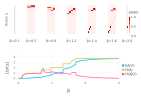

In [6]:
#create a plot where the entropic performance plot is shown and on top of it several solutions of p(a|o)
#for different tempereatures (ideally lying in the plateaus)

using Gadfly

β_plts = [0.1, 0.5, 0.8, 1.2, 1.4, 1.6, 2]
#β_plts = [0.1, 1.2, 2]

nβ = length(β_plts)

#preallocate
I = zeros(nβ)
Ha = zeros(nβ)
Hago = zeros(nβ)
EU = zeros(nβ)
RDobj = zeros(nβ)
plots = Array(Plot,nβ)

for i=1:nβ    
    pago, pa, I[i], Ha[i], Hago[i], EU[i], RDobj[i] = BAiterations(pa_init, β_plts[i], U_pre, Umax, p_o, ε, maxiter,compute_performance=true)  

    #except for the last plot, provide an optional argument that will be passed on to the underlying Gadfly Theme()
    #to suppress drawing of the colorkey (legend)
    β_val = β_plts[i]
    if i==1
        pcond = visualizeBAconditional(pago, a_vec, o_vec, olabel="β=$β_val", alabel="Action a", 
        legendlabel="", key_position = :none, minor_label_font_size = 0pt,  major_label_font_size = 9pt,
        bar_spacing = 0pt)
    elseif i<nβ
        pcond = visualizeBAconditional(pago, a_vec, o_vec, olabel="β=$β_val", alabel="",
        legendlabel="", key_position = :none,  minor_label_font_size = 0pt,  major_label_font_size = 9pt,
        bar_spacing = 0pt)
    else
        pcond = visualizeBAconditional(pago, a_vec, o_vec, olabel="β=$β_val", alabel="",
        legendlabel="p(a|o)",  minor_label_font_size = 0pt, major_label_font_size = 9pt,
        key_title_font_size = 9pt, key_label_font_size = 8pt, bar_spacing = 0pt )
    end

    #display(pcond)
    plots[i] = pcond
end

#compose final plot
plot_evolution = vstack(hstack(plots...),plot_perf_entropy)

In [7]:
#uncomment to store plots

#using Gadfly

#plot_performance = vstack(plot_perf_entropy, plot_perf_util)
#draw(SVG("Figures/TempSweep_Performance.svg", 8.5cm, 11cm), plot_performance)
#draw(SVG("Figures/RateUtilityCurve.svg", 8.5cm, 7cm), plot_rateutility)

#draw(SVG("Figures/TempSweepEvolution.svg", 18cm, 13cm), plot_evolution)